Task1: EDA (Expected outcome - Exploring the nature of data & Identifying the techniques to be used in the next tasks)

Task2: Data Cleaning (Expected Outcome - Cleaned data to be fed to the model)

Task3: Dimensionality Reduction (Expected outcome - reduced  number of columns)

Task4: Model Building (Expected outcome - building a binary classifier)

Task5: Visualization & Interpretation (Expected outcome - charts to depict the Evaluation and results of model)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv(r'C:\Users\goveasraina\Downloads\Test2_dataset.csv - Test2_dataset.csv.csv')
df.head()

,Pid,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,8670,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,B,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,M,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pid                      569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           566 non-null    float64
 9   concave points_mean      566 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

There are 32 attributes in the dataset. Diagnosis being the target class and is binary in nature.There are total of 569 instances in the dataset and 30 columns are of nature float64 while target class being an object and pid being an integer. We need to encode the target attribute.

The target is binary in nature and hence we need to build a binary classifier.

Various steps to be followed are:


1.   Handle missing values
2.   Handle outliers
3.   Label encode target variable
4.   Dimensionality reduction
5.   Model Building
6.   Model Evaluation

In [ ]:
df.describe()

,Pid,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,566.000000,566.000000,569.000000,...,569.000000,546.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.089270,0.049178,0.181162,...,16.269190,25.675385,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079667,0.038741,0.027414,...,4.833242,6.156301,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029680,0.020413,0.161900,...,13.010000,21.085000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061680,0.033770,0.179200,...,14.970000,25.405000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.131600,0.074030,0.195700,...,18.790000,29.705000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The above table gives descriptive statistics of the dataset in hand.

In [ ]:
df.isna().sum()

Pid                         0
diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean              3
concave points_mean         3
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se                3
concave points_se           2
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst              23
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave points_worst        0
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

There are 4 columns with missing values and are less in number compared to the total number of instances, hence we can impute them.

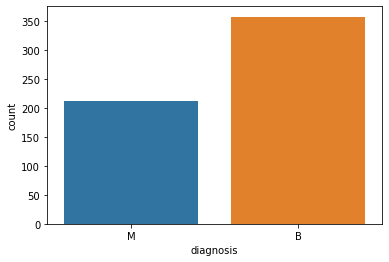

In [ ]:
sns.countplot(x='diagnosis', data=df)

In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

The dataset can be considered balanced as the ratio of two classes present is 62% and 38% approximately.

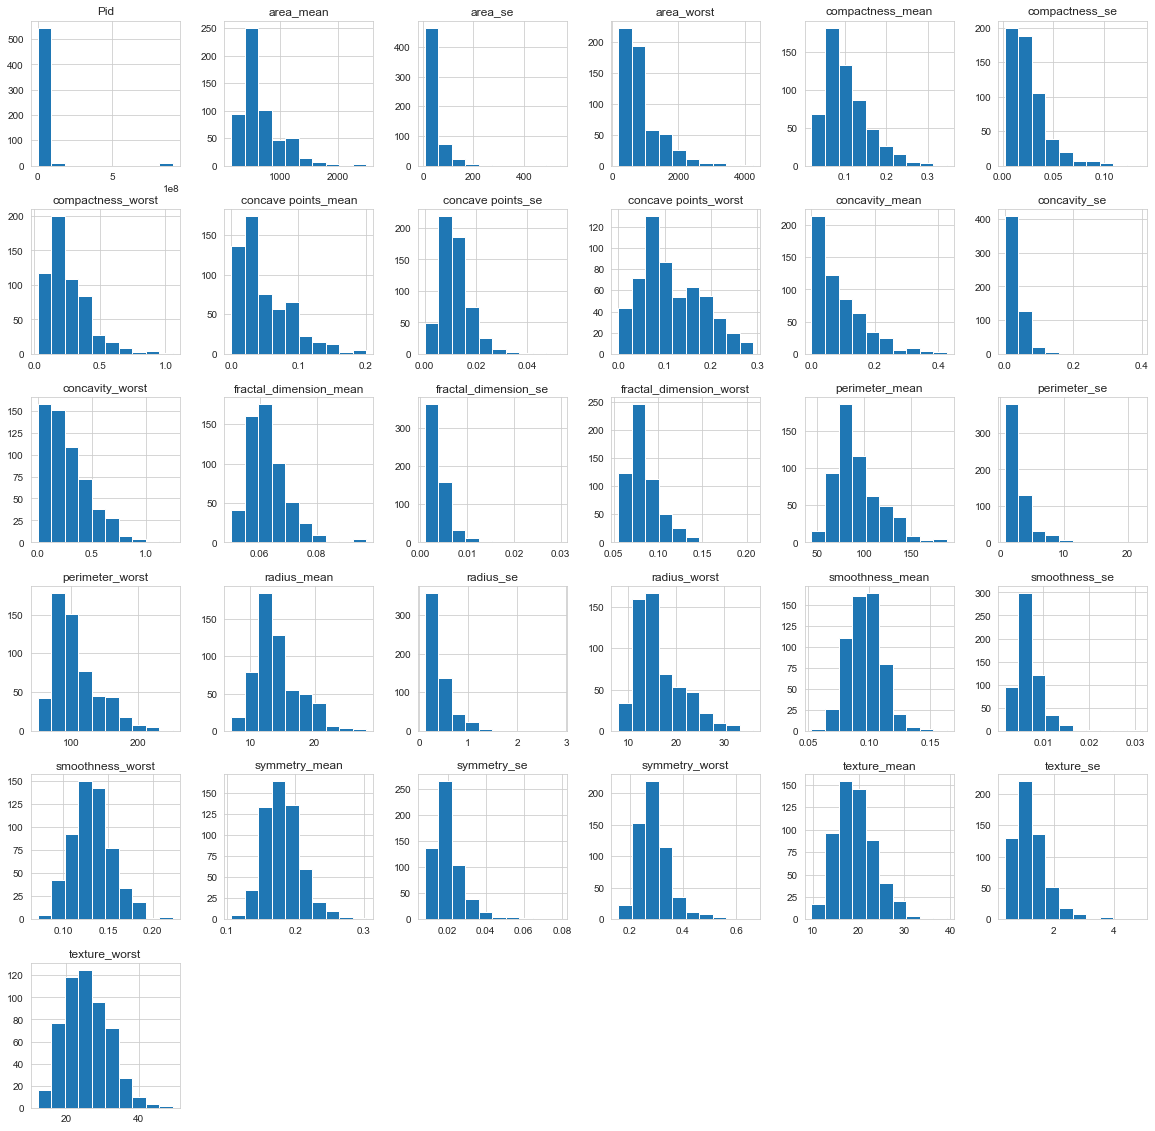

In [ ]:
sns.set_style('whitegrid')
df.hist(figsize=(20,20))
plt.show()

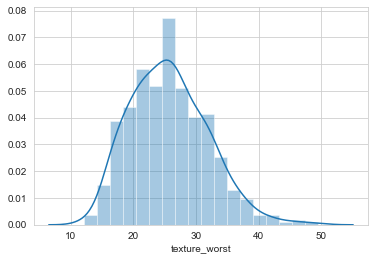

In [ ]:
sns.distplot(df.texture_worst)

## Data Cleaning - Handling Missing value and outliers

The data in the attribute texture_worst can be considered to follow an approximately normal distribution and hence we can use mean value to impute missing values.

In [ ]:
# missing value imputation
df['texture_worst'].fillna((df['texture_worst'].mean()), inplace=True)

In [ ]:
df['concavity_se'].fillna((df['concavity_se'].mean()), inplace=True)
df['concavity_mean'].fillna((df['concavity_mean'].mean()), inplace=True)
df['concave points_se'].fillna((df['concave points_se'].mean()), inplace=True)

df['concave points_mean'].fillna((df['concave points_mean'].mean()), inplace=True)

In [ ]:
df.isna().sum()

Pid                        0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# dropped the column as it is not useful
df.drop(columns = ["Pid"],inplace = True)

In [ ]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder
 
# label_encoder object knows how to understand word labels.
label_encoder = LabelEncoder()
 
# Encode labels in column 'species'.
df['diagnosis']= label_encoder.fit_transform(df['diagnosis'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
# outlier removal
df_temp = df[df.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                495 non-null    int32  
 1   radius_mean              495 non-null    float64
 2   texture_mean             495 non-null    float64
 3   perimeter_mean           495 non-null    float64
 4   area_mean                495 non-null    float64
 5   smoothness_mean          495 non-null    float64
 6   compactness_mean         495 non-null    float64
 7   concavity_mean           495 non-null    float64
 8   concave points_mean      495 non-null    float64
 9   symmetry_mean            495 non-null    float64
 10  fractal_dimension_mean   495 non-null    float64
 11  radius_se                495 non-null    float64
 12  texture_se               495 non-null    float64
 13  perimeter_se             495 non-null    float64
 14  area_se                  4

In [ ]:
df_temp['diagnosis'].value_counts()

0    332
1    163
Name: diagnosis, dtype: int64

After removal of outliers, the dataset has 494 instances. 

In [ ]:
# separate x and y from the dataset
X = df_temp.drop("diagnosis", axis = 1)
y = df_temp.diagnosis.values

## Class Balancing

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2) 
X_new, y_new = sm.fit_resample(X, y.ravel())

## StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
X_sc = scaler.fit_transform(X_new)
print(X_sc)

[[ 0.2107727   0.00806286  0.24611415 ...  0.45688183 -0.14020062
  -0.20022631]
 [-0.56692414 -1.67432903 -0.63136963 ... -1.15469545 -1.18748775
  -0.95919603]
 [ 0.05946981 -0.09245741  0.03925654 ...  0.4156608   0.10773667
   0.11119876]
 ...
 [ 0.09262171  0.84751871  0.13543011 ...  0.98387335 -0.31671719
   0.34301078]
 [ 0.19988104  1.07717443  0.31370252 ...  1.37600781  0.08160864
   1.39799716]
 [ 1.98237732  0.89807542  2.03006078 ...  1.72350078  1.21132234
   0.53635223]]


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train_1,X_test_1,y_train,y_test = train_test_split(X_sc,y_new,random_state=0,stratify=y_new)

## Linear Discriminant Analysis

LDA is choosen as the dataset is labelled and LDA works on supervised dataset.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train_1, y_train)
X_test = lda.transform(X_test_1)
LDA_df = pd.DataFrame(X_test_1)
LDA_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.202383,0.840577,0.333871,0.061183,2.022763,2.141630,1.819273,1.139898,0.566733,1.865347,...,0.024927,1.433906,0.172867,-0.091490,1.944677,1.731552,1.584045,1.548530,0.305128,1.791075
1,-0.648628,-0.608285,-0.687624,-0.672453,-0.850298,-1.178633,-0.948817,-0.870633,0.004909,-0.605132,...,-0.614928,-0.724588,-0.684513,-0.640849,-0.535573,-0.836030,-0.550834,-0.415190,0.718654,-0.673895
2,-0.491273,0.341367,-0.450203,-0.534995,-0.775799,0.108013,0.252808,-0.516085,-1.060019,-0.252359,...,-0.513180,-0.101853,-0.384221,-0.531661,0.072976,0.717617,0.946805,-0.092182,-0.683679,-0.093668
3,-0.037364,-0.687643,-0.085655,-0.131681,-0.803331,-0.879830,-0.609545,-0.721997,-1.747504,-1.461606,...,-0.146004,-0.105616,-0.219190,-0.252997,-0.936443,-0.413211,-0.236084,-0.748751,-0.897897,-1.178500
4,-0.745462,-0.113620,-0.808993,-0.761488,-1.068936,-1.468011,-1.282663,-1.276874,-1.163366,-0.388740,...,-0.833906,0.462559,-0.913938,-0.816020,-0.550063,-1.303806,-1.423608,-1.382730,-0.701531,-0.758454
5,-0.733357,-1.190245,-0.790832,-0.746805,-0.770131,-1.381056,-1.079435,-0.933065,-1.019579,-0.819705,...,-0.871509,-1.721715,-0.927529,-0.838015,-1.390441,-1.480273,-1.349098,-1.249174,-1.209306,-1.606108
6,-1.987356,-0.690288,-1.968192,-1.581549,-0.836532,-1.057745,-1.158842,-1.351850,-0.129892,0.625936,...,-1.804048,-0.760334,-1.796368,-1.409286,-0.187831,-0.958364,-1.236990,-1.616701,0.391377,-0.619585
7,-1.293178,-0.042197,-1.272761,-1.162302,0.288237,-0.436808,-0.944397,-1.177354,1.883136,0.585931,...,-1.234261,-0.506349,-1.247559,-1.093899,-0.564552,-0.859732,-1.173639,-1.511340,-0.162019,-0.521276
8,-0.839269,1.439154,-0.820952,-0.833653,0.540075,-0.285993,-0.571595,-0.297284,0.099270,1.256927,...,-0.915747,0.820019,-0.915556,-0.875720,-0.120214,-0.602830,-0.709926,-0.057557,-0.612273,-0.040733
9,0.283398,0.227620,0.223967,0.182597,-0.029192,-0.384730,-0.396015,-0.035239,-0.808390,-1.108833,...,0.661341,1.282837,0.534774,0.607151,0.377251,0.716088,0.030023,0.501401,1.049898,0.220507


## Model Building

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression as logr
model_lr = logr().fit(X_train_1,y_train)

In [ ]:
#K-NN classifier
from sklearn.neighbors import KNeighborsClassifier  
classifier_knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
model_knn = classifier_knn.fit(X_train_1, y_train)  

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train_1, y_train)

## Model Evaluation

In [ ]:
score_lr = model_lr.score(X_test_1,y_test)
print(score_lr)

0.9759036144578314


In [ ]:
score_knn = model_knn.score(X_test_1,y_test)
print(score_knn)

0.963855421686747


In [ ]:
score_rfc = model_rfc.score(X_test_1,y_test)
print(score_rfc)

0.9036144578313253


Logestic regression was the best of all giving an accuracy of 98.2% and the other two are also decent ones.

## ROC Curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.995


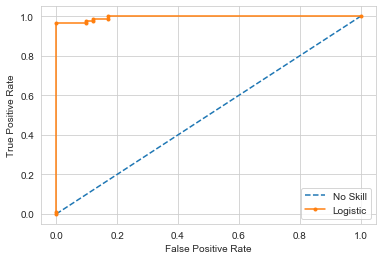

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = model_lr.predict_proba(X_test_1)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()
# show the plot
plt.show()